# Part 1

## Download

In [3]:
!git clone https://gist.github.com/jeff-boykin/b5c536467c30d66ab97cd1f5c9a3497d data

Cloning into 'data'...
remote: Counting objects: 7, done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 7
Unpacking objects: 100% (7/7), done.
data                         data_science_immersive.ipynb


In [4]:
!ls data

breast-cancer.csv field_names.txt


## Data set

Depending on the type of analysis or task at hand we might want to normalize and transform the data to make it more gaussian

In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn
from pandasql import *
%matplotlib inline

#### Add headers to the dataframe

In [183]:
headers = pd.read_csv('data/field_names.txt', header=None)
print headers.values.flatten()
df = pd.read_csv('data/breast-cancer.csv', names=headers.values.flatten(), index_col='ID')
df.head()

['ID' 'diagnosis' 'radius_mean' 'radius_sd_error' 'radius_worst'
 'texture_mean' 'texture_sd_error' 'texture_worst' 'perimeter_mean'
 'perimeter_sd_error' 'perimeter_worst' 'area_mean' 'area_sd_error'
 'area_worst' 'smoothness_mean' 'smoothness_sd_error' 'smoothness_worst'
 'compactness_mean' 'compactness_sd_error' 'compactness_worst'
 'concavity_mean' 'concavity_sd_error' 'concavity_worst'
 'concave_points_mean' 'concave_points_sd_error' 'concave_points_worst'
 'symmetry_mean' 'symmetry_sd_error' 'symmetry_worst'
 'fractal_dimension_mean' 'fractal_dimension_sd_error'
 'fractal_dimension_worst']


,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
ID,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [188]:
df.describe()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### Check diagnosis distribution and smooothness & compactness grouped by diagnosis

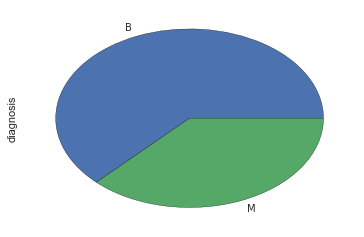

In [33]:
df['diagnosis'].value_counts().plot(kind='pie')

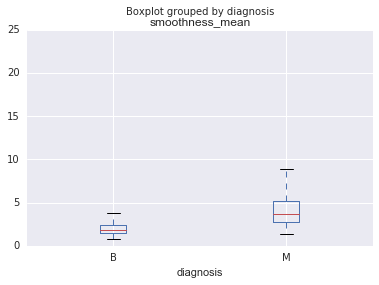

In [103]:
df.boxplot(by='diagnosis', column='smoothness_mean')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x119963810>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x119d98110>], dtype=object)

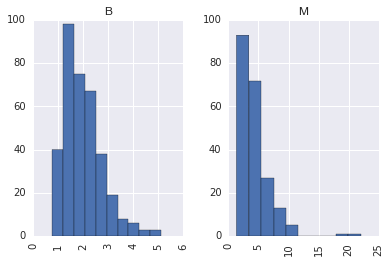

In [106]:
df.hist(by='diagnosis', column='smoothness_mean')

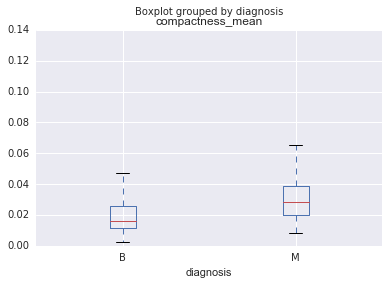

In [104]:
df.boxplot(by='diagnosis', column='compactness_mean')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x119edee90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x119fc2910>], dtype=object)

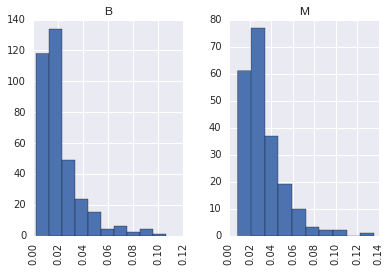

In [107]:
df.hist(by='diagnosis', column='compactness_mean')

In [36]:
pysqldf = lambda q: sqldf(q, globals())

In [109]:
q  = """
SELECT avg(smoothness_mean), avg(compactness_mean)
FROM df
GROUP BY diagnosis
;
"""
result = pysqldf(q)
result

,avg(smoothness_mean),avg(compactness_mean)
0,2.000321,0.021438
1,4.323929,0.032281


#### Compute mean and median

In [116]:
grouped = df.groupby('diagnosis')
print("mean:", grouped.smoothness_mean.mean())
print("median:", grouped.smoothness_mean.median())

('mean:', diagnosis
B    2.000321
M    4.323929
Name: smoothness_mean, dtype: float64)
('median:', diagnosis
B    1.8510
M    3.6795
Name: smoothness_mean, dtype: float64)


- to check if the distribution differ we would need to run an independent 2-sample statistical test for M & B groups such as t-test if the data (or transformed data) is normally distributed (doesn't seem to be the case here). Otherwise we would use an non-parametric Mann-Whitney test.

#### Bootstrap sampling of data

we randomly select with replacement a subset of the data

In [122]:
bootstrap = df.sample(frac=0.1, replace=True)
print df.shape, bootstrap.shape
bootstrap.head()

(569, 31) (57, 31)


,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
ID,,,,,,,,,,,,,,,,,,,,,
868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
873701,M,15.70,20.31,101.20,766.6,0.09597,0.08799,0.06593,0.05189,0.1618,...,20.11,32.82,129.30,1269.0,0.1414,0.3547,0.29020,0.15410,0.3437,0.08631
884626,B,12.89,14.11,84.95,512.2,0.08760,0.13460,0.13740,0.03980,0.1596,...,14.39,17.70,105.00,639.1,0.1254,0.5849,0.77270,0.15610,0.2639,0.11780
87556202,M,14.86,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,...,16.08,27.78,118.60,784.7,0.1316,0.4648,0.45890,0.17270,0.3000,0.08701
856106,M,13.28,20.28,87.32,545.2,0.10410,0.14360,0.09847,0.06158,0.1974,...,17.38,28.00,113.10,907.2,0.1530,0.3724,0.36640,0.14920,0.3739,0.10270


## Exploratory analysis

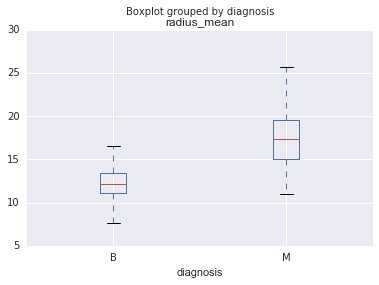

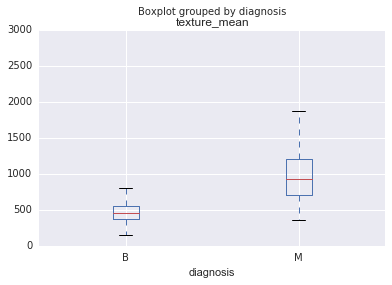

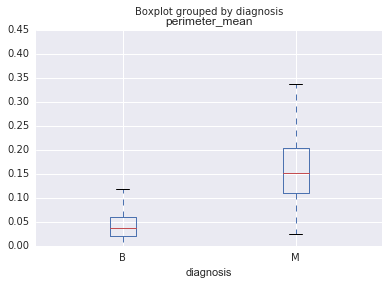

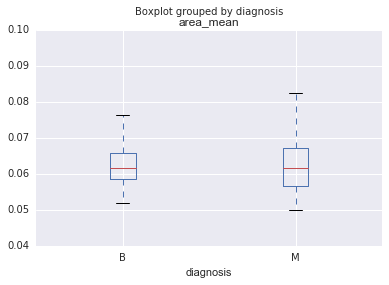

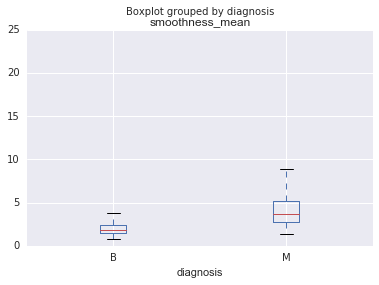

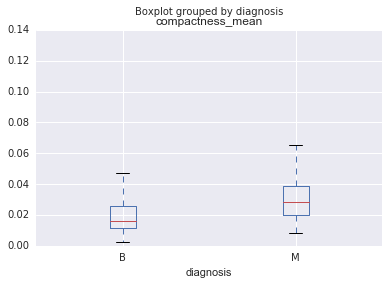

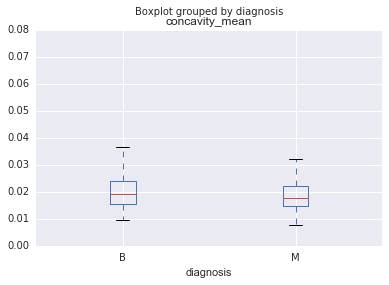

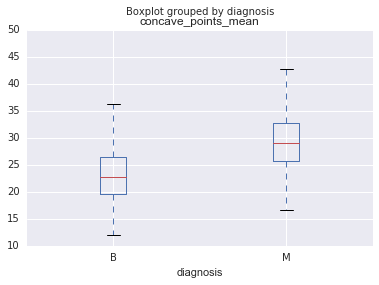

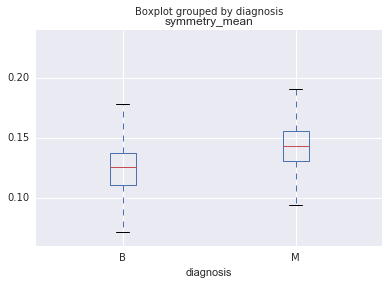

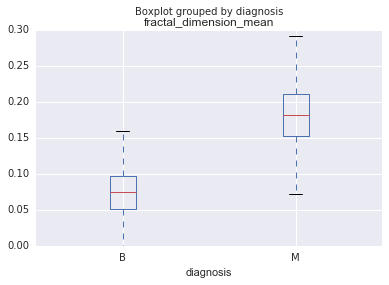

In [130]:
df.boxplot(by='diagnosis', column='radius_mean')
df.boxplot(by='diagnosis', column='texture_mean')
df.boxplot(by='diagnosis', column='perimeter_mean')
df.boxplot(by='diagnosis', column='area_mean')
df.boxplot(by='diagnosis', column='smoothness_mean')
df.boxplot(by='diagnosis', column='compactness_mean')
df.boxplot(by='diagnosis', column='concavity_mean')
df.boxplot(by='diagnosis', column='concave_points_mean')
df.boxplot(by='diagnosis', column='symmetry_mean')
df.boxplot(by='diagnosis', column='fractal_dimension_mean');

it looks like radius and texture mean might be good predictors of a malignant tumor with higher values associated with malignant tumors

## Modeling

In [213]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.cross_validation import train_test_split

In [214]:
y = df.diagnosis
X = df[df.columns[1:]]
X_ = preprocessing.normalize(X)
y_ = y.replace(['M', 'B'], [1,0])

print X_[:1]
print y_[:1]

[[  7.92541486e-03   4.57286305e-03   5.40989964e-02   4.40986119e-01
    5.21605959e-05   1.22295451e-04   1.32207727e-04   6.48042538e-05
    1.06567974e-04   3.46753421e-05   4.82397403e-04   3.98825907e-04
    3.78384593e-03   6.75796909e-02   2.81905112e-06   2.16043549e-05
    2.36705136e-05   6.99145825e-06   1.32295836e-05   2.72829873e-06
    1.11810466e-02   7.63465478e-03   8.13247128e-02   8.89461512e-01
    7.14564920e-05   2.93227133e-04   3.13624394e-04   1.16920795e-04
    2.02695018e-04   5.23808686e-05]]
ID
842302    1
Name: diagnosis, dtype: int64


In [216]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=42)
print X_.shape, y_.shape
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(569, 30) (569,)
(455, 30) (455,)
(114, 30) (114,)


In [227]:
lr = linear_model.LogisticRegression(C=2., random_state=0) #,  class_weight='balanced')
#lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [228]:
print lr.score(X_train, y_train)
print lr.score(X_test, y_test)

0.828571428571
0.877192982456


5−Fold Cross Validation Accuracy: 0.81 (+/− 0.02)
−−−−−− training set report−−−−−
             precision    recall  f1-score   support

          0       0.79      1.00      0.88       286
          1       0.99      0.54      0.70       169

avg / total       0.86      0.83      0.81       455

−−−−−−− testing set report −−−−−
             precision    recall  f1-score   support

          0       0.84      1.00      0.91        71
          1       1.00      0.67      0.81        43

avg / total       0.90      0.88      0.87       114



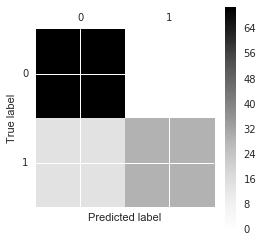

In [229]:
from sklearn import cross_validation, metrics
from scipy.stats import sem
cv = cross_validation.KFold(X_train.shape[0], 5, shuffle=True , random_state=33)
scores = cross_validation.cross_val_score(lr, X_train, y_train , cv=cv )
print("%d−Fold Cross Validation Accuracy: %0.2f (+/− %0.2f)"%(5,scores.mean() , sem(scores)))
print "−−−−−− training set report−−−−−"
y_pred_train = lr.predict(X_train)
print metrics.classification_report(y_train, y_pred_train)
print "−−−−−−− testing set report −−−−−"
y_pred_test = lr.predict(X_test)
print metrics.classification_report(y_test, y_pred_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)
plt.matshow(confusion_matrix)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()


[learning_curve] Training set sizes: [ 36 117 199 281 363]


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


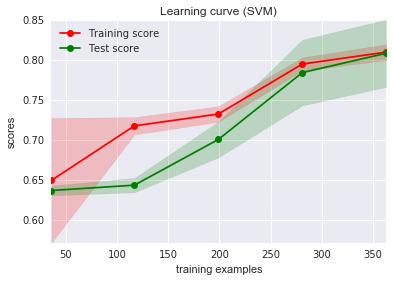

In [232]:
from sklearn.learning_curve import learning_curve
def plotLearningCurve(X_train, y_train, clf):
    plt.figure()
    plt.title ("Learning curve (SVM)")
    plt.xlabel("training examples")
    plt.ylabel("scores")
    train_sizes , train_scores , test_scores = learning_curve(clf , X_train , y_train , cv=5, verbose=1)
    train_scores_mean = np.mean(train_scores , axis=1)
    train_scores_std = np.std(train_scores , axis=1)
    test_scores_mean = np.mean(test_scores , axis=1)
    test_scores_std = np.std(test_scores , axis=1)
    plt.plot(train_sizes, train_scores_mean , 'o-', label="Training score", color="r")
    plt.fill_between(train_sizes , train_scores_mean-train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="r")
    plt.plot(train_sizes, test_scores_mean,'o-', label="Test score",color ="g")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std , test_scores_mean + test_scores_std , alpha=0.2, color="g")
    plt.legend(loc ="best")
    plt.autoscale(tight=True)
    plt.show()
    
plotLearningCurve(X_train, y_train, lr)

114
114
[ 0.  1.] [ 0.6744186  1.       ] [1 0]


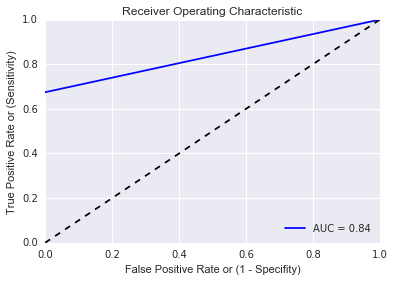

In [233]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_test)

print len(y_test)
print len(y_pred_test)
print fpr, tpr, _

roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [201]:
import xgboost

In [235]:
xgb = xgboost.XGBClassifier()
xgb.fit(X_train, y_train)
print(model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [239]:
print xgb.score(X_train, y_train)
print xgb.score(X_test, y_test)

0.997802197802
0.956140350877


In [238]:
y_pred = xgb.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.61%


5−Fold Cross Validation Accuracy: 0.95 (+/− 0.01)
−−−−−− training set report−−−−−
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       286
          1       1.00      0.99      1.00       169

avg / total       1.00      1.00      1.00       455

−−−−−−− testing set report −−−−−
             precision    recall  f1-score   support

          0       0.95      0.99      0.97        71
          1       0.97      0.91      0.94        43

avg / total       0.96      0.96      0.96       114



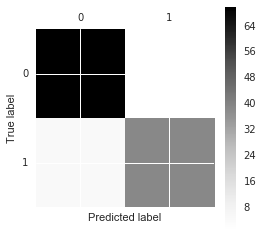

In [242]:
from sklearn import cross_validation, metrics
from scipy.stats import sem
cv = cross_validation.KFold(X_train.shape[0], 5, shuffle=True , random_state=33)
scores = cross_validation.cross_val_score(xgb, X_train, y_train , cv=cv )
print("%d−Fold Cross Validation Accuracy: %0.2f (+/− %0.2f)"%(5,scores.mean() , sem(scores)))
print "−−−−−− training set report−−−−−"
y_pred_train = xgb.predict(X_train)
print metrics.classification_report(y_train, y_pred_train)
print "−−−−−−− testing set report −−−−−"
y_pred_test = xgb.predict(X_test)
print metrics.classification_report(y_test, y_pred_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)
plt.matshow(confusion_matrix)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()

[learning_curve] Training set sizes: [ 36 117 199 281 363]


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.7s finished


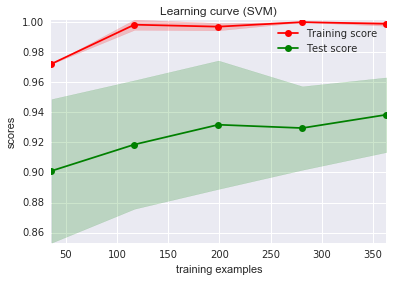

In [247]:
from sklearn.learning_curve import learning_curve
def plotLearningCurve(X_train, y_train, clf):
    plt.figure()
    plt.title ("Learning curve (SVM)")
    plt.xlabel("training examples")
    plt.ylabel("scores")
    train_sizes , train_scores , test_scores = learning_curve(clf , X_train , y_train , cv=5, verbose=1)
    train_scores_mean = np.mean(train_scores , axis=1)
    train_scores_std = np.std(train_scores , axis=1)
    test_scores_mean = np.mean(test_scores , axis=1)
    test_scores_std = np.std(test_scores , axis=1)
    plt.plot(train_sizes, train_scores_mean , 'o-', label="Training score", color="r")
    plt.fill_between(train_sizes , train_scores_mean-train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="r")
    plt.plot(train_sizes, test_scores_mean,'o-', label="Test score",color ="g")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std , test_scores_mean + test_scores_std , alpha=0.2, color="g")
    plt.legend(loc ="best")
    plt.autoscale(tight=True)
    plt.show()
    
plotLearningCurve(X_train, y_train, xgb)

114
114
[ 0.          0.01408451  1.        ] [ 0.          0.90697674  1.        ] [2 1 0]


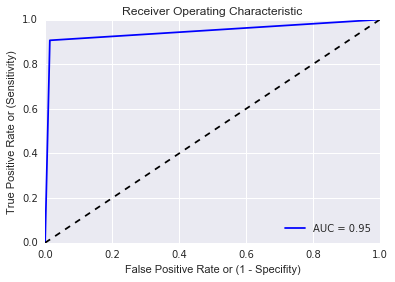

In [248]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_test)

print len(y_test)
print len(y_pred_test)
print fpr, tpr, _

roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

## Explanation

### Technical

### Non-technical

# Part 2

- Code:
    - Feel free to comment on style, library usage, or other improvements.
- Methodology
    - Feel free to comment on the student's data setup, modeling methodology, and model evaluation.
- Conceptual Understanding
    - Finally, feel free to add any suggestions or takeaways on how the student could continue to improve their understanding of these concepts.

### Data 

In [251]:
import pandas as pd
df = pd.read_csv('data/part-2-data.train.csv')
df.tail()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
9995,66190726,Senior Optometrist Ebbe Vale,This is an excellent opportunity for a dedicat...,Ebbe Vale,UK,part_time,NaN,NaN,Healthcare & Nursing Jobs,"52,000 per year",52000,careworx.co.uk
9996,66190728,Domiciliary Optometrist Kent,Domiciliary Optometrist Kent The Company prid...,Kent,Kent,part_time,NaN,NaN,Healthcare & Nursing Jobs,"60,000 per year",60000,careworx.co.uk
9997,66190734,Optometrist Job Hastings,This is an excellent opportunity for a dedicat...,"Hastings, East Sussex",Hastings,part_time,NaN,NaN,Healthcare & Nursing Jobs,"50,000 per year",50000,careworx.co.uk
9998,66190736,Optometrist Job Doncaster,This is an excellent opportunity for a dedicat...,Doncaster,Doncaster,part_time,NaN,NaN,Healthcare & Nursing Jobs,"35,000 to 60,000 per year",47500,careworx.co.uk
9999,66190737,Experienced RHAD Job Lincoln,We provide a community hearing service to thos...,"Lincoln, Lincolnshire",Lincoln,full_time,NaN,NaN,Healthcare & Nursing Jobs,"18,000 to 40,000 per year",29000,careworx.co.uk


### Student 1

In [256]:
#!/usr/bin/env python

import pandas as pd
import numpy as np

# from sklearn import LinearRegression => need to import linear_model first
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
d = pd.read_csv('data/part-2-data.train.csv')


# Setup data for prediction
#x1 = data.SalaryNormalized # data is not defined. use d
x1 = d.SalaryNormalized
#x2 = pd.get_dummies(data.ContractType)
x2 = pd.get_dummies(d.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
# scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
# at least 2 folds for cross validation otherwise it doesn't really make sense
scores = cross_val_score(model, x2, x1, cv=3, scoring='mean_absolute_error')
print(scores.mean())


-11914.7348819


/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/usr/local/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be remo

### Student 2

In [ ]:
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
data = pd.read_csv('../data/train.csv')


# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean())